In [1]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
## Data cleaning
# Import data
stroke = pd.read_csv("C:/Users/Budha/Desktop/Python_Projects/Data/Stroke/healthcare-dataset-stroke-data.csv")
print(stroke)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [3]:
print(stroke.shape)

(5110, 12)


In [4]:
# Missing values 

# Find nulls
print(stroke.isna().sum())
print(stroke.describe())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.0000

In [5]:
# Missing values treatment
# Let's replace the nulls with mean 

[stroke['bmi'].fillna(stroke['bmi'].mean(), inplace=True) for bmi in stroke.columns]
stroke.head()
print(stroke)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-

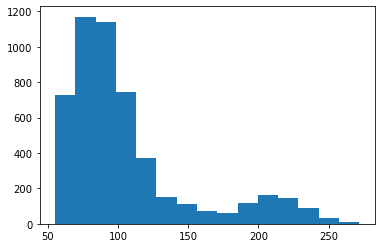

In [6]:
# Outliers
# Distribution of meta scores 
plt.hist(stroke['avg_glucose_level'],bins = 15)
plt.show()

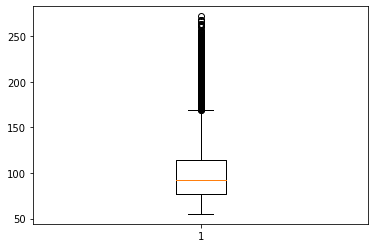

In [46]:
# Checking for outliers - another way
plt.figure(1)
plt.boxplot(stroke['avg_glucose_level'])
plt.show()

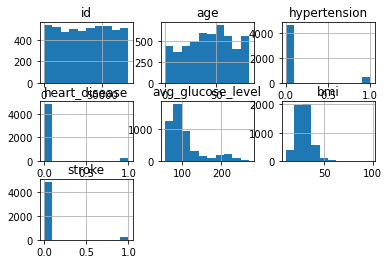

In [7]:
stroke.hist()
plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

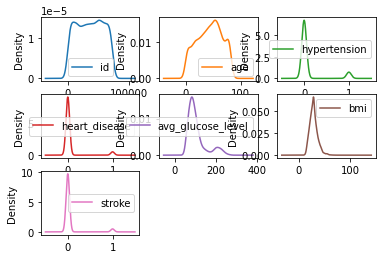

In [8]:
stroke.plot(kind = 'density',subplots = True, layout = (3,3),sharex = False)

In [13]:
# Correlation
corr_mat = stroke.corr()
print(corr_mat)

                         id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.002999  0.325942      0.160189       0.038899   
stroke             0.006388  0.245257      0.127904       0.134914   

                   avg_glucose_level       bmi    stroke  
id                          0.001092  0.002999  0.006388  
age                         0.238171  0.325942  0.245257  
hypertension                0.174474  0.160189  0.127904  
heart_disease               0.161857  0.038899  0.134914  
avg_glucose_level           1.000000  0.168751  0.131945  
bmi                         0.168751  1.000000  0.038947  
stroke                    

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [16]:
train, test = train_test_split(stroke, test_size = 0.25)
print(train.shape)
print(test.shape)

(3832, 12)
(1278, 12)


In [47]:
train_x = train[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
train_y = train[['stroke']]

test_x = train[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
test_y = train[['stroke']]

In [51]:
# Using Logistic Regression
model = LogisticRegression()
model.fit(train_x, train_y.values.ravel())
prediction = model.predict(test_x)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.949634655532359


In [52]:
# Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_x,train_y.values.ravel())

pred_y = model1.predict(test_x)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(test_y,pred_y))

Acc= 0.949634655532359
